# Lesson 5

This lesson is for those that want to continue practicing further after the main lessons 1-4.

Here we are going to study the kidney function data that you saw back in lesson 2. We will plot this data and then try and predict when the patient will need dialysis when they hit stage 5 kidney disease (GFR < 15). ESRD = end stage renal disease.

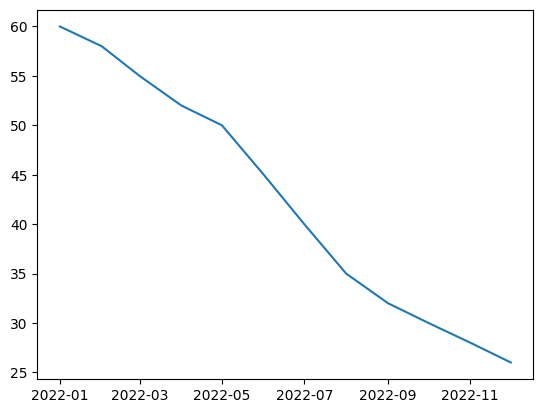

In [1]:
# import the 'pandas' library as the alias 'pd'
import pandas as pd

# import the 'matplotlib.pyplot' library as the alias 'plot'
import matplotlib.pyplot as plot

# Load kidney function data from the file 'kidney_function.csv'. Save as 'kidney_function_data'
kidney_function_data = pd.read_csv('kidney_function.csv')

# Convert the Date column to the datetime format. You can do this with the 'pd.to_datetime()' function.
kidney_function_data['Date'] = pd.to_datetime(kidney_function_data['Date'])

# Plot GFR over time using the plot(x-axis values, y-axis values) function.
plot.plot(kidney_function_data['Date'], kidney_function_data['GFR (mL/min)'])

# Show the plot
plot.show()


## Let's make it pretty

Now let's make the plot a little more interesting by adding a title, labels for the x and y axes, and a legend.

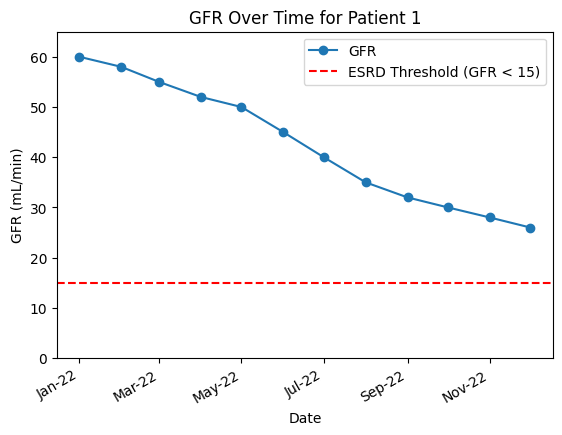

In [2]:
# Copy the code from above minus the last lines with 'plot.plot()' and 'plot.show()'

# Import the 'pandas' library as the alias 'pd'
import pandas as pd

# Import the 'matplotlib.pyplot' library as the alias 'plot'
import matplotlib.pyplot as plot

# Import the 'matplotlib.dates' library as the alias 'mdates'
import matplotlib.dates as mdates

# Load kidney function data from the file 'kidney_function.csv'. Save as 'df'
kidney_function_data = pd.read_csv('kidney_function.csv')

# Convert the Date column to the datetime format. You can do this with the 'pd.to_datetime()' function.
kidney_function_data['Date'] = pd.to_datetime(kidney_function_data['Date'])

# Plot GFR over time using the plot(x-axis values, y-axis values) function.
# Now, add a marker argument of 'o' and a label argument of 'GFR'
# See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html for help.
plot.plot(kidney_function_data['Date'], kidney_function_data['GFR (mL/min)'], marker='o', label='GFR')

# Add a horizontal line at y=15 with a red dashed line style and a label of 'ESRD Threshold (GFR < 15)'
# Try out the axhline function. Documentation for this function can be found at
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
plot.axhline(y=15, color='r', linestyle='--', label='ESRD Threshold (GFR < 15)')

# Add a title to the plot
plot.title('GFR Over Time for Patient 1')

# Add a label to the x-axis
plot.xlabel('Date')

# Add a label to the y-axis
plot.ylabel('GFR (mL/min)')

# Set y-axis to start at 0 and end at the maximum GFR value + 5
# See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html
plot.ylim(0, max(kidney_function_data['GFR (mL/min)']) + 5)

# We have formatted the x-axis dates for you. Just uncomment the two lines below.
plot.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plot.gcf().autofmt_xdate()

# Add a legend to the plot. 'legend()' should do the trick.
plot.legend()

# Show the plot
plot.show()

## Some linear regression

The above plot should show you the decline in the kidney function over time. When the GFR is less than 15, then the patient is in End-stage kidney failure.

The trend looks fairly linear. Let's work out the rate of decline with some simple linear regression.

In [3]:
# Calculate the difference in GFR over time (rate of change). This can be done by taking the difference between consecutive GFR 
# values and dividing by the number of days between the two dates. You will need to use the 'diff()' function to calculate the
# difference between consecutive GFR values. You will also need to use the 'dt.days' attribute to get the number of days between
# the two dates. Save this as a new column 'GFR_change'.
kidney_function_data['GFR_change'] = kidney_function_data['GFR (mL/min)'].diff() / kidney_function_data['Date'].diff().dt.days

# Calculate the average rate of GFR decline per day. You can do this by using the 'mean()' function on the 'GFR_change' column.
average_gfr_decline_per_day = kidney_function_data['GFR_change'].mean()

# Print the average rate of GFR decline per day
print(f"Average GFR decline per day: {average_gfr_decline_per_day:.4f} mL/min/day")

Average GFR decline per day: -0.1017 mL/min/day


## Predicting when dialysis is needed

Now we can work out when dialysis is needed

In [4]:
# Get the last value of GFR. You can get the last value of a column using the 'iloc' function with index -1, eg .iloc[-1].
latest_gfr = kidney_function_data['GFR (mL/min)'].iloc[-1]

# Print the latest GFR value
print(f"Latest GFR value: {latest_gfr} mL/min")

# Get the last date in the dataset
last_date = kidney_function_data['Date'].iloc[-1]

# Print the last date in the dataset
print(f"Last date in the dataset: { last_date.strftime('%d/%m/%Y') }")

# Calculate days until GFR reaches 15. This one is a little tricky. You can calculate this by taking the difference between the
# latest GFR value and 15, and then dividing by the average GFR decline per day. Save this as 'days_to_esrd'.
days_to_esrd = (latest_gfr - 15) / - average_gfr_decline_per_day

# Print the number of days until ESRD
print(f"Number of days predicted until ESRD: { int(days_to_esrd) }")

# Predict the date when GFR will reach 15. You can do this by adding the number of days to the last known GFR date. You can use the
# 'pd.to_timedelta()' function to convert the number of days to a timedelta object. You also need to state the unit of time as 'D'.
predicted_esrd_date = last_date + pd.to_timedelta(days_to_esrd, unit='D')

# Format the predicted ESRD date as DD-MM-YYYY. Hint, use '.strftime('%d/%m/%Y')'.
formatted_predicted_date = predicted_esrd_date.strftime('%d/%m/%Y')

# Print the predicted date for ESRD
print(f"Predicted date for ESRD (GFR < 15 mL/min): {formatted_predicted_date}")

Latest GFR value: 26 mL/min
Last date in the dataset: 01/12/2022
Number of days predicted until ESRD: 108
Predicted date for ESRD (GFR < 15 mL/min): 19/03/2023


## Plotting the prediction

It would be nice to plot the prediction decline on a graph. 

We need to make some data points for this first.

In [5]:
# Import the 'numpy' library as the alias 'np'
import numpy as np

# Create an array of future dates for extrapolation, starting from the latest date in the dataset and extending by the number of
# days until ESRD. You can use the 'pd.date_range()' function for this. You will need to specify the 'start' date and the 'periods'
# See https://pandas.pydata.org/docs/reference/api/pandas.date_range.html for documentation.
future_dates = pd.date_range(start=last_date, periods=int(days_to_esrd)+1)

# Print the future dates
print(f"Future dates are:\n\n{ future_dates}")

# Extrapolate GFR values based on the rate of decline
future_gfrs = latest_gfr + np.arange(0, len(future_dates)) * average_gfr_decline_per_day

# Print the future GFR values
print(f"Future GFRs are:\n\n{ future_gfrs }")

Future dates are:

DatetimeIndex(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-10',
               ...
               '2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13',
               '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17',
               '2023-03-18', '2023-03-19'],
              dtype='datetime64[ns]', length=109, freq='D')
Future GFRs are:

[26.         25.89827538 25.79655076 25.69482614 25.59310152 25.4913769
 25.38965228 25.28792766 25.18620304 25.08447842 24.98275381 24.88102919
 24.77930457 24.67757995 24.57585533 24.47413071 24.37240609 24.27068147
 24.16895685 24.06723223 23.96550761 23.86378299 23.76205837 23.66033375
 23.55860913 23.45688451 23.35515989 23.25343527 23.15171065 23.04998604
 22.94826142 22.8465368  22.74481218 22.64308756 22.54136294 22.43963832
 22.3379137  22.23618908 22.13446446 22.03273984 21.93101522 21.8292906
 21.

## Put it all together

We are now going to put everything together in a single plot.

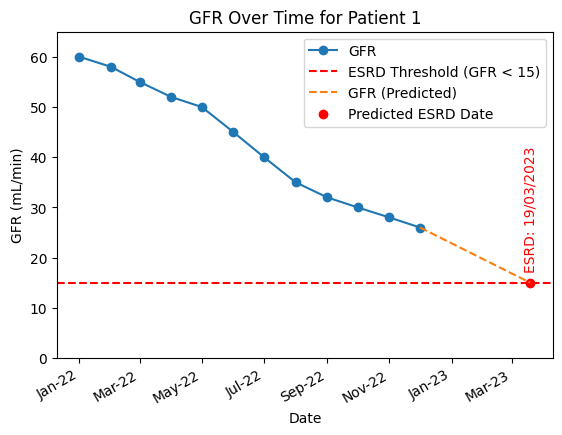

In [6]:
# Copy the code from the last cell where you created a plot minus the last 'legend' and 'show' functions.

# Import the 'pandas' library as the alias 'pd'
import pandas as pd

# Import the 'matplotlib.pyplot' library as the alias 'plot'
import matplotlib.pyplot as plot

# Import the 'matplotlib.dates' library as the alias 'mdates'
import matplotlib.dates as mdates

# Load kidney function data from the file 'kidney_function.csv'. Save as 'df'
kidney_function_data = pd.read_csv('kidney_function.csv')

# Convert the Date column to the datetime format. You can do this with the 'pd.to_datetime()' function.
kidney_function_data['Date'] = pd.to_datetime(kidney_function_data['Date'])

# Plot GFR over time using the plot(x-axis values, y-axis values) function.
# Add a marker argument of 'o' and a label argument of 'GFR'
plot.plot(kidney_function_data['Date'], kidney_function_data['GFR (mL/min)'], marker='o', label='GFR')

# Add a horizontal line at y=15 with a red dashed line style and a label of 'ESRD Threshold (GFR < 15)'
# Try out the axhline function. Documentation for this function can be found at
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
plot.axhline(y=15, color='r', linestyle='--', label='ESRD Threshold (GFR < 15)')

# Add a title to the plot
plot.title('GFR Over Time for Patient 1')

# Add a label to the x-axis
plot.xlabel('Date')

# Add a label to the y-axis
plot.ylabel('GFR (mL/min)')

# Set y-axis to start at 0 and end at the maximum GFR value + 5
# See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html
plot.ylim(0, max(kidney_function_data['GFR (mL/min)']) + 5)

# We have formatted the x-axis dates for you. Just uncomment the two lines below.
plot.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plot.gcf().autofmt_xdate()

# Plot the GFR extrapolation. Use the linestyle '--' for a dashed line and set a label of 'GFR (Predicted)'.
plot.plot(future_dates, future_gfrs, linestyle='--', label='GFR (Predicted)')

# Add a marker and annotation for the predicted ESRD date. You can use the 'scatter()' function to plot a point on the graph.
# Set the colour to 'red' and the label to 'Predicted ESRD Date'.
plot.scatter(predicted_esrd_date, 15, color='red', label='Predicted ESRD Date')

# Add an annotation for the predicted ESRD date. You can use the 'annotate()' function to add text to the plot.
# See documentation at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html.
plot.annotate(f'ESRD: {formatted_predicted_date}',
             (predicted_esrd_date, 15),
             textcoords="offset points", xytext=(0,10), ha='center', color='red', rotation=90)

# Add a legend to the plot.
plot.legend()

# Finally, show the plot
plot.show()